# K-Means Clustering Algorithm:

#### Importing libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
plt.style.use('dark_background')

### Visualizing the data:

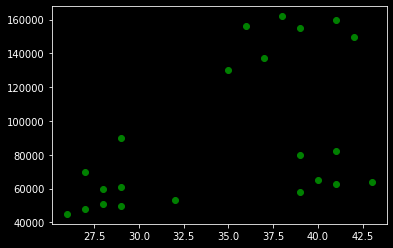

In [4]:
plt.scatter(df['Age'],df['Income($)'],color='g')
plt.show()

### Trying to cluster the data, with k=3:

In [5]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['Age','Income($)']])
y_pred

C:\Users\MYPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

### Visualizing the clusters:

In [6]:
df['clusters']=y_pred
df.head()

,Name,Age,Income($),clusters
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [7]:
df_0=df[df['clusters']==0]
df_0.head()

,Name,Age,Income($),clusters
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0


In [8]:
df_1=df[df['clusters']==1]
df_1.head()

,Name,Age,Income($),clusters
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1


In [9]:
df_2=df[df['clusters']==2]
df_2.head()

,Name,Age,Income($),clusters
0,Rob,27,70000,2
1,Michael,29,90000,2
19,Alia,39,80000,2
20,Sid,41,82000,2


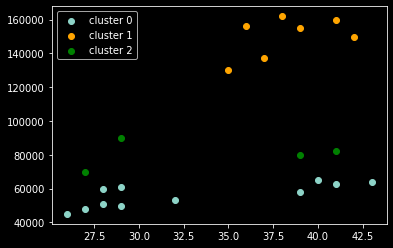

In [10]:
plt.scatter(df_0['Age'],df_0['Income($)'],label='cluster 0')
plt.scatter(df_1['Age'],df_1['Income($)'],color='orange',label='cluster 1')
plt.scatter(df_2['Age'],df_2['Income($)'],color='green',label='cluster 2')
plt.legend()
plt.show()

#### Reflection:
#### Data has not been clustered properly, as some of the cluster-1 points seems to be near to the centroid of cluster-0, and the cluster-0 points are not grouped proerly

### Scaling the data using MinMax Algorithm for efficient clustering:

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
df=df.drop('clusters',axis=1)
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [13]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($)
0,Rob,27,0.213675
1,Michael,29,0.384615
2,Mohan,29,0.136752
3,Ismail,28,0.128205
4,Kory,42,0.897436


In [14]:
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


### Clustering the data points using scaled data:

In [15]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['Age','Income($)']])
y_pred

C:\Users\MYPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [17]:
df['cluster']=y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [19]:
df_0=df[df['cluster']==0]
df_0.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
11,Tom,0.000000,0.000000,0


In [20]:
df_1=df[df['cluster']==1]
df_1.head()

,Name,Age,Income($),cluster
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1


In [22]:
df_2=df[df['cluster']==2]
df_2.head()

,Name,Age,Income($),cluster
16,Dipika,0.823529,0.170940,2
17,Priyanka,0.882353,0.153846,2
18,Nick,1.000000,0.162393,2
19,Alia,0.764706,0.299145,2
20,Sid,0.882353,0.316239,2


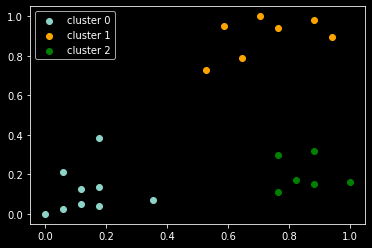

In [23]:
plt.scatter(df_0['Age'],df_0['Income($)'],label='cluster 0')
plt.scatter(df_1['Age'],df_1['Income($)'],color='orange',label='cluster 1')
plt.scatter(df_2['Age'],df_2['Income($)'],color='green',label='cluster 2')
plt.legend()
plt.show()

#### Reflection: Properly clustered

### Finding the cluster centers:

In [24]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

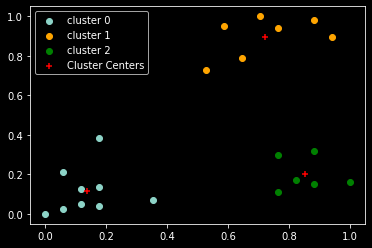

In [26]:
plt.scatter(df_0['Age'],df_0['Income($)'],label='cluster 0')
plt.scatter(df_1['Age'],df_1['Income($)'],color='orange',label='cluster 1')
plt.scatter(df_2['Age'],df_2['Income($)'],color='green',label='cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],label='Cluster Centers',marker='+',color='red')
plt.legend()
plt.show()

### Evaluating efficient k value using Elbow Technique:

In [31]:
k_range=np.arange(1,11)
k_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [32]:
sse=[]
for i in k_range:
    km=KMeans(n_clusters=i)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\MYPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MYPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MYPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MYPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

In [33]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.3625079900797329,
 0.2621792762345213,
 0.21055478995472493,
 0.1685851223602976,
 0.13781880133764024,
 0.11490780678851839,
 0.07831232180040332]

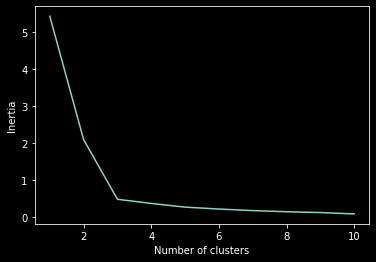

In [34]:
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.plot(k_range,sse)
plt.show()